In [1]:
import os, shutil
from google.colab import drive
drive.mount('/content/gdrive')
# 표시되는 화면에서 자신이 사용 중인 구글 드라이브를 선택하고 진행
os.chdir('gdrive/My Drive')
%cd Test/Audio/
# gdrive/My Drive/Test/Audio/에 본 예제에 사용되는 rain.wav 파일이 존재 (테스트에 사용될 wav 파일을 미리 업로드 해 두어야 함)

Mounted at /content/gdrive
/content/gdrive/My Drive/Test/Audio


In [2]:
import librosa, librosa.display
audio_data = 'rain.wav'
x , sr = librosa.load(audio_data, sr=44100)

In [3]:
import sklearn
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
spectral_rolloff.shape

(608,)

In [4]:
# Computing the time variable for visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)

<Figure size 864x288 with 0 Axes>

In [5]:
# Normalising for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

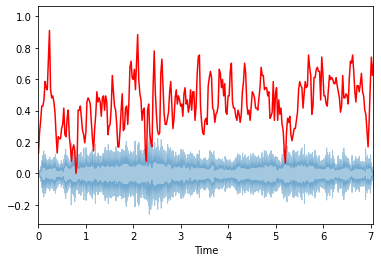

In [6]:
# Plotting the Spectral Rolloff along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')